In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv("heart_failure_dataset.csv")
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,72.0,0,211,0,25,0,274000.00,1.2,134,0,0,207,0
509,60.0,0,166,0,30,0,62000.00,1.7,127,0,0,207,1
510,70.0,0,93,0,35,0,185000.00,1.1,134,1,1,208,1
511,40.0,1,129,0,35,0,255000.00,0.9,137,1,0,209,1


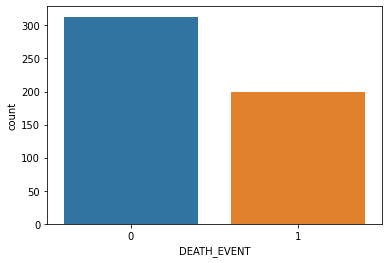

In [3]:
sns.countplot(x='DEATH_EVENT', data=dataset)

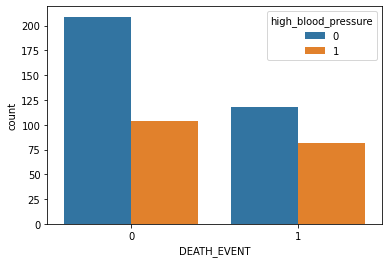

In [4]:
sns.countplot(x='DEATH_EVENT',data=dataset,hue='high_blood_pressure')

In [5]:
dataset.drop(['anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','serum_creatinine','serum_sodium','sex','smoking', 'time'], 
             axis=1,inplace=True)
dataset

,age,platelets,DEATH_EVENT
0,75.0,265000.00,1
1,55.0,263358.03,1
2,65.0,162000.00,1
3,50.0,210000.00,1
4,65.0,327000.00,1
...,...,...,...
508,72.0,274000.00,0
509,60.0,62000.00,1
510,70.0,185000.00,1
511,40.0,255000.00,1


In [6]:
from sklearn.model_selection import train_test_split
x=dataset.drop('DEATH_EVENT',axis=1)
y=dataset['DEATH_EVENT']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [7]:
print(x_train)

      age  platelets
487  60.0   283000.0
59   72.0   254000.0
463  57.0   395000.0
403  65.0   276000.0
424  50.0   153000.0
..    ...        ...
359  60.0   365000.0
195  77.0   223000.0
251  55.0   231000.0
323  82.0    47000.0
192  50.0   260000.0

[384 rows x 2 columns]


In [8]:
 print(x_test)

      age  platelets
283  65.0  263358.03
100  65.0  298000.00
37   82.0  321000.00
46   51.0  271000.00
374  65.0  263358.03
..    ...        ...
379  55.0  270000.00
49   57.0  395000.00
281  70.0   51000.00
231  70.0  185000.00
124  60.0  217000.00

[129 rows x 2 columns]


In [9]:
print(y_train)

487    0
59     1
463    1
403    0
424    1
      ..
359    1
195    1
251    0
323    1
192    0
Name: DEATH_EVENT, Length: 384, dtype: int64


In [10]:
print(y_test)

283    0
100    0
37     1
46     1
374    0
      ..
379    0
49     1
281    0
231    0
124    1
Name: DEATH_EVENT, Length: 129, dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
print(x_train)

[[-1.11100651e-01  2.52034874e-01]
 [ 8.41662065e-01 -4.82494848e-02]
 [-3.49291330e-01  1.41175378e+00]
 [ 2.85883814e-01  1.79552443e-01]
 [-9.05069582e-01 -1.09406743e+00]
 [-1.54024473e+00  1.10111479e+00]
 [-9.05069582e-01 -7.21300635e-01]
 [-9.05069582e-01  7.28347996e-01]
 [ 2.66779060e+00  2.09515956e+00]
 [-7.46275796e-01  6.86929463e-01]
 [ 8.41662065e-01  8.21539693e-01]
 [-9.05069582e-01  1.58843177e-01]
 [-1.06386337e+00 -1.77747321e+00]
 [ 1.47683721e+00  1.33927135e+00]
 [-6.66878903e-01  7.38702629e-01]
 [-9.05069582e-01 -7.21300635e-01]
 [-1.11100651e-01  4.86494821e-02]
 [ 6.03471386e-01  7.60061121e-02]
 [ 2.66779060e+00 -6.48818203e-01]
 [ 6.82868279e-01  1.34962598e+00]
 [ 2.85883814e-01  7.07638730e-01]
 [ 6.82868279e-01 -2.24278247e-01]
 [-6.66878903e-01 -3.69243110e-01]
 [-6.66878903e-01  4.86494821e-02]
 [ 2.27080614e+00 -5.65981139e-01]
 [-1.22265715e+00  9.25086024e-01]
 [ 6.03471386e-01 -3.17469945e-01]
 [ 1.07985274e+00  4.86494821e-02]
 [ 2.85883814e-01 -1

In [13]:
print(x_test)

[[ 0.28588381  0.04864948]
 [ 0.28588381  0.40735437]
 [ 1.635631    0.64551093]
 [-0.82567269  0.12777928]
 [ 0.28588381  0.04864948]
 [ 0.68286828 -0.10002265]
 [ 0.28588381 -0.01718559]
 [ 1.635631   -2.19165853]
 [-0.90506958  1.50494548]
 [-0.6668789   0.73870263]
 [ 0.92105896  0.04864948]
 [ 1.07985274  0.06565148]
 [-1.54024473 -0.45208017]
 [-0.11110065  0.04864948]
 [ 0.28588381  0.04864948]
 [ 2.03261546  0.03458758]
 [ 0.68286828 -2.418425  ]
 [-0.90506958  0.21061634]
 [-1.22265715  0.04864948]
 [-0.90506958  0.53160997]
 [ 0.68286828  2.84069314]
 [ 0.68286828  0.6040924 ]
 [-0.82567269 -0.38995238]
 [-0.26989444 -1.09406743]
 [ 0.28588381  0.39699974]
 [-0.90506958  1.07005089]
 [-0.11110065  0.25203487]
 [-0.03170376 -0.30711531]
 [ 0.68286828  0.95614992]
 [-0.50808512  0.5730285 ]
 [-0.90506958  0.62480167]
 [-0.11110065 -0.31746994]
 [-0.90506958  0.03458758]
 [-1.06386337 -0.15179582]
 [-0.11110065 -0.56598114]
 [ 0.4446776  -0.45208017]
 [-0.11110065  0.81118506]
 

In [14]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
y_pred = classifier.predict(x_test)
dataset1=pd.DataFrame({'Data Aktual Terkena Gagal Jantung' :y_test,'Data Prediksi Terkena Gagal Jantung':y_pred})
dataset1

,Data Aktual Terkena Gagal Jantung,Data Prediksi Terkena Gagal Jantung
283,0,0
100,0,0
37,1,1
46,1,0
374,0,0
...,...,...
379,0,0
49,1,0
281,0,1
231,0,0


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74        79
           1       0.57      0.32      0.41        50

    accuracy                           0.64       129
   macro avg       0.62      0.58      0.58       129
weighted avg       0.63      0.64      0.61       129



In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[67 12]
 [34 16]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show>

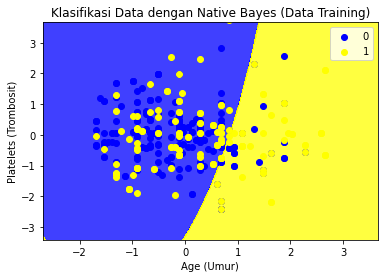

In [18]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap= ListedColormap(('blue', 'yellow')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('blue', 'yellow'))(j), label = j)
plt.title('Klasifikasi Data dengan Native Bayes (Data Training)')
plt.xlabel('Age (Umur)')
plt.ylabel('Platelets (Trombosit)')
plt.legend()
plt.show

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


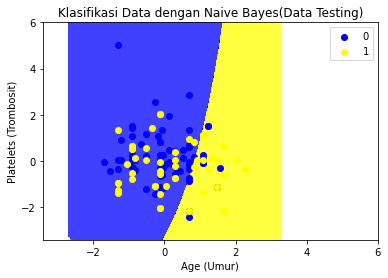

In [19]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('blue','yellow')))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],
              c = ListedColormap(('blue','yellow'))(i),label = j)
plt.title('Klasifikasi Data dengan Naive Bayes(Data Testing)')
plt.xlabel('Age (Umur)')
plt.ylabel('Platelets (Trombosit)')
plt.legend()
plt.show()

In [20]:
print(accuracy_score(y_test, y_pred)*100)

64.34108527131784
